In [1]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
# RSI: 상대강도지수.
df = fdr.DataReader("005930")

delta = df['Close'].diff()

# 상승분과 하락분 분리
gain = delta.where(delta > 0, 0).rolling(window = 14).mean()
loss = -delta.where(delta < 0, 0).rolling(window = 14).mean()

In [65]:
gain = delta.where(delta > 0, 0).ewm(alpha = 1 / 14, adjust = False, min_periods = 14).mean()
loss = -delta.where(delta < 0, 0).ewm(alpha = 1 / 14, adjust = False, min_periods = 14).mean()

In [66]:
# RS : 상대강도 // RS = 평균 상승값 / 평균 하락값
RS = gain / (loss + 1e-10)
RS

Date
2013-04-11         NaN
2013-04-12         NaN
2013-04-15         NaN
2013-04-16         NaN
2013-04-17         NaN
                ...   
2025-06-25    1.703644
2025-06-26    1.369374
2025-06-27    1.484629
2025-06-30    1.230149
2025-07-01    1.414745
Name: Close, Length: 3000, dtype: float64

In [67]:
RSI = 100 - (100 / (1 + RS))
RSI

Date
2013-04-11          NaN
2013-04-12          NaN
2013-04-15          NaN
2013-04-16          NaN
2013-04-17          NaN
                ...    
2025-06-25    63.012883
2025-06-26    57.794753
2025-06-27    59.752548
2025-06-30    55.159954
2025-07-01    58.587751
Name: Close, Length: 3000, dtype: float64

In [25]:
def calculate_rsi(data, window = 14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0).rolling(window = 14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window = 14).mean()
    RS = gain / (loss + 1e-10)
    RSI = 100 - (100 / (1 + RS))
    return RSI

In [27]:
calculate_rsi(df['Close'])

Date
2013-04-11          NaN
2013-04-12          NaN
2013-04-15          NaN
2013-04-16          NaN
2013-04-17          NaN
                ...    
2025-06-25    62.237762
2025-06-26    53.900709
2025-06-27    53.571429
2025-06-30    52.083333
2025-07-01    53.535354
Name: Close, Length: 3000, dtype: float64

In [29]:
# RSI 값이 70 이상이면 매도신호 / 30 이하라면 매수신호 
import numpy as np

df['RSI'] = calculate_rsi(df['Close'])
df = df.dropna()
df

,Open,High,Low,Close,Volume,Change,RSI
Date,,,,,,,
2013-04-30,29800,30600,29760,30400,374100,0.026334,44.949495
2013-05-02,30520,30640,30340,30560,200979,0.005263,47.087379
2013-05-03,30700,30740,30420,30700,131181,0.004581,54.736842
2013-05-06,30800,30800,30240,30280,173086,-0.013681,47.804878
2013-05-07,30160,30160,29820,29860,228690,-0.013871,42.081448
...,...,...,...,...,...,...,...
2025-06-25,61500,61600,60300,61300,23933612,0.013223,62.237762
2025-06-26,61300,61300,59900,60200,19402300,-0.017945,53.900709
2025-06-27,60100,61600,60000,60800,17340470,0.009967,53.571429


In [34]:
import warnings
warnings.filterwarnings("ignore")

df["Signal"] = np.where(df['RSI'] >= 70, "매도", "보유")
df["Signal"] = np.where(df['RSI'] <= 30, "매수", df['Signal'])
df

,Open,High,Low,Close,Volume,Change,RSI,Signal
Date,,,,,,,,
2013-04-30,29800,30600,29760,30400,374100,0.026334,44.949495,보유
2013-05-02,30520,30640,30340,30560,200979,0.005263,47.087379,보유
2013-05-03,30700,30740,30420,30700,131181,0.004581,54.736842,보유
2013-05-06,30800,30800,30240,30280,173086,-0.013681,47.804878,보유
2013-05-07,30160,30160,29820,29860,228690,-0.013871,42.081448,보유
...,...,...,...,...,...,...,...,...
2025-06-25,61500,61600,60300,61300,23933612,0.013223,62.237762,보유
2025-06-26,61300,61300,59900,60200,19402300,-0.017945,53.900709,보유
2025-06-27,60100,61600,60000,60800,17340470,0.009967,53.571429,보유


In [36]:
signal = df[(df['Signal'] == '매수') | (df['Signal'] == "매도")]
signal

,Open,High,Low,Close,Volume,Change,RSI,Signal
Date,,,,,,,,
2013-06-12,27560,28060,27240,27700,457753,-0.002880,27.037037,매수
2013-06-13,27600,27940,27140,27140,670197,-0.020217,26.739927,매수
2013-06-14,27299,27540,27140,27380,351167,0.008843,29.328622,매수
2013-06-17,27400,27559,27299,27320,235169,-0.002191,28.268551,매수
2013-06-19,27640,27700,27280,27380,205405,-0.012978,25.259516,매수
...,...,...,...,...,...,...,...,...
2025-03-26,59800,61400,59700,61400,16431645,0.026756,77.952756,매도
2025-03-27,60900,62000,60800,61800,20389790,0.006515,82.400000,매도
2025-03-28,60700,61100,60000,60200,16282514,-0.025890,73.049645,매도


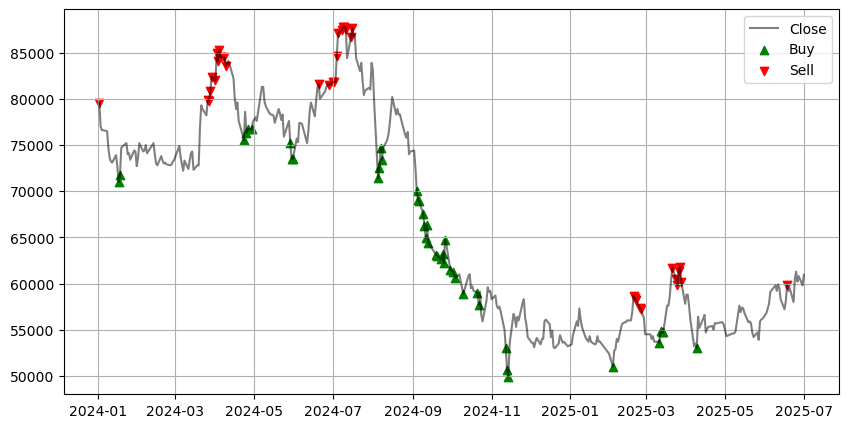

In [42]:
df2 = df[df.index.year >= 2024]

plt.figure(figsize = (10, 5))
plt.plot(df2['Close'], color = 'k', alpha = 0.5)

buy = df2[df2['Signal'] == "매수"]
plt.scatter(buy.index, buy['Close'], marker = '^', color = 'green')

sell = df2[df2['Signal'] == "매도"]
plt.scatter(sell.index, sell['Close'], marker = 'v', color = 'red')

plt.legend(['Close', 'Buy', 'Sell'])
plt.grid()
plt.show()

In [43]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

def rsi_func(series, n):
    s = pd.Series(series)
    delta = s.diff()
    gain = delta.where(delta > 0, 0).rolling(window = 14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window = 14).mean()
    RS = gain / (loss + 1e-10)
    RSI = 100 - (100 / (1 + RS))
    return RSI

In [81]:
class RsiStrategy(Strategy):
    
    period = 10
    stock_buy = 25
    stock_sell = 75

    def init(self):
        self.rsi = self.I(rsi_func, self.data.Close, self.period)

    def next(self):
        # RSI가 30을 상향 돌파하고, 현재 포지션이 없는 경우
        if crossover(self.rsi, self.stock_buy) and not self.position:
            self.buy()

        # RSI가 70을 하향 돌파하고 현재 포지션이 있을 때
        elif crossover(self.stock_sell, self.rsi) and self.position:
            self.position.close()

In [48]:
df = fdr.DataReader("005930")
bt = Backtest(df, RsiStrategy, cash = 100000, commission=0.002)

stats = bt.run()
stats

Backtest.run:   0%|          | 0/2986 [00:00<?, ?bar/s]

Start                     2013-04-11 00:00:00
End                       2025-07-01 00:00:00
Duration                   4464 days 00:00:00
Exposure Time [%]                        51.9
Equity Final [$]                    81857.952
Equity Peak [$]                    102435.952
Commissions [$]                      8952.048
Return [%]                          -18.14205
Buy & Hold Return [%]                99.34211
Return (Ann.) [%]                    -1.66749
Volatility (Ann.) [%]                14.58325
CAGR [%]                             -1.12371
Sharpe Ratio                         -0.11434
Sortino Ratio                        -0.16591
Calmar Ratio                          -0.0459
Alpha [%]                            -58.5183
Beta                                  0.40644
Max. Drawdown [%]                   -36.32835
Avg. Drawdown [%]                    -32.9539
Max. Drawdown Duration     4077 days 00:00:00
Avg. Drawdown Duration     2198 days 00:00:00
# Trades                          

In [52]:
from tqdm import tqdm

kospi = fdr.StockListing("KOSPI")

total = []

for i in tqdm(range(len(kospi))):

    try:
        row = kospi.iloc[i]
        code = row['Code']
        name = row['Name']
        df = fdr.DataReader(code)
        rsi = calculate_rsi(df['Close']).iloc[-1]
        total.append([code, name, rsi])
    except:
        continue

100%|████████████████████████████████████████████████████████████████████████████████| 962/962 [02:40<00:00,  6.01it/s]


In [55]:
pd.DataFrame(total, columns = ['Code', 'Name', 'RSI']).sort_values("RSI")

,Code,Name,RSI
769,091090,세원이앤씨,0.000000
913,204210,스타에스엠리츠,0.000000
854,074610,이엔플러스,0.000000
852,005030,부산주공,0.000000
607,033180,KH 필룩스,0.000000
...,...,...,...
572,214330,금호에이치티,89.147287
690,011230,삼화전자,89.328063
65,298040,효성중공업,89.527027
930,00806K,대덕1우,90.909091


In [70]:
# 1.
df_samsung = fdr.DataReader("005930", "2020")
df_samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [71]:
# 2.
df_samsung['RSI'] = calculate_rsi(df_samsung['Close'])
df_samsung

,Open,High,Low,Close,Volume,Change,RSI
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN
...,...,...,...,...,...,...,...
2025-06-25,61500,61600,60300,61300,23933612,0.013223,62.237762
2025-06-26,61300,61300,59900,60200,19402300,-0.017945,53.900709
2025-06-27,60100,61600,60000,60800,17340470,0.009967,53.571429


In [74]:
# 3.
df_samsung["RSI_10"] = calculate_rsi(df['Close'], 10)
df_samsung.tail()

,Open,High,Low,Close,Volume,Change,RSI,RSI_10
Date,,,,,,,,
2025-06-25,61500,61600,60300,61300,23933612,0.013223,62.237762,62.237762
2025-06-26,61300,61300,59900,60200,19402300,-0.017945,53.900709,53.900709
2025-06-27,60100,61600,60000,60800,17340470,0.009967,53.571429,53.571429
2025-06-30,61200,61200,59800,59800,17110294,-0.016447,52.083333,52.083333
2025-07-01,60400,61100,60200,60900,6253757,0.018395,53.378378,53.061224


In [77]:
df_samsung["Signal_Custom"] = np.where(df_samsung['RSI'] >= 75, "매도", "보유")
df_samsung["Signal_Custom"] = np.where(df_samsung['RSI'] <= 25, "매수", df_samsung["Signal_Custom"])
df_samsung

,Open,High,Low,Close,Volume,Change,RSI,RSI_10,Signal_Custom
Date,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,69.072165,보유
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,68.750000,보유
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,63.414634,보유
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,57.746479,보유
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN,62.962963,보유
...,...,...,...,...,...,...,...,...,...
2025-06-25,61500,61600,60300,61300,23933612,0.013223,62.237762,62.237762,보유
2025-06-26,61300,61300,59900,60200,19402300,-0.017945,53.900709,53.900709,보유
2025-06-27,60100,61600,60000,60800,17340470,0.009967,53.571429,53.571429,보유


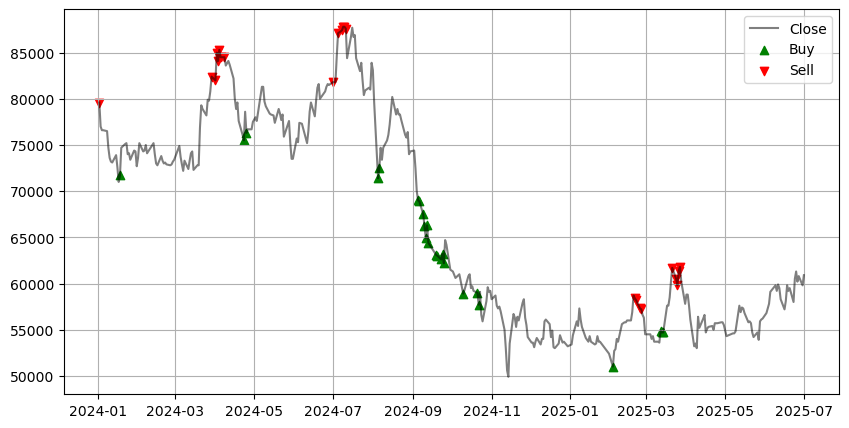

In [78]:
df2 = df_samsung[df_samsung.index.year >= 2024]

plt.figure(figsize = (10, 5))
plt.plot(df2['Close'], color = 'k', alpha = 0.5)

buy = df2[df2['Signal_Custom'] == "매수"]
plt.scatter(buy.index, buy['Close'], marker = '^', color = 'green')

sell = df2[df2['Signal_Custom'] == "매도"]
plt.scatter(sell.index, sell['Close'], marker = 'v', color = 'red')

plt.legend(['Close', 'Buy', 'Sell'])
plt.grid()
plt.show()

In [80]:
df = fdr.DataReader("MSFT")

bt = Backtest(df, RsiStrategy, cash = 50000, commission=0.002)
stats = bt.run()
stats

Backtest.run:   0%|          | 0/9887 [00:00<?, ?bar/s]

Start                     1986-03-13 00:00:00
End                       2025-06-30 00:00:00
Duration                  14354 days 00:00:00
Exposure Time [%]                    39.09706
Equity Final [$]                1358834.43796
Equity Peak [$]                 1368683.81742
Commissions [$]                  214748.26817
Return [%]                         2617.66888
Buy & Hold Return [%]            520824.53629
Return (Ann.) [%]                      8.7685
Volatility (Ann.) [%]                24.50474
CAGR [%]                              5.96901
Sharpe Ratio                          0.35783
Sortino Ratio                         0.60405
Calmar Ratio                          0.15506
Alpha [%]                       -224585.05571
Beta                                  0.43624
Max. Drawdown [%]                   -56.55038
Avg. Drawdown [%]                    -5.29315
Max. Drawdown Duration     3139 days 00:00:00
Avg. Drawdown Duration      108 days 00:00:00
# Trades                          

In [83]:
# 7.
df = fdr.DataReader("005380")
bt = Backtest(df, RsiStrategy, cash = 5000000, commission=0.002)
stats = bt.run()
stats

Backtest.run:   0%|          | 0/2986 [00:00<?, ?bar/s]

Start                     2013-04-11 00:00:00
End                       2025-07-01 00:00:00
Duration                   4464 days 00:00:00
Exposure Time [%]                    44.26667
Equity Final [$]                    3820700.2
Equity Peak [$]                     5495085.0
Commissions [$]                      279799.8
Return [%]                            -23.586
Buy & Hold Return [%]                 4.13534
Return (Ann.) [%]                     -2.2343
Volatility (Ann.) [%]                19.17519
CAGR [%]                              -1.5071
Sharpe Ratio                         -0.11652
Sortino Ratio                        -0.17062
Calmar Ratio                         -0.03896
Alpha [%]                           -25.17907
Beta                                  0.38523
Max. Drawdown [%]                   -57.34166
Avg. Drawdown [%]                   -13.35896
Max. Drawdown Duration     3959 days 00:00:00
Avg. Drawdown Duration      700 days 00:00:00
# Trades                          

In [86]:
# 볼린저 밴드
# 중심선(이동평균선 : 평균)
# 상단선: 표준편차에 2배를 더한 값
# 하단선: 뺀 값

df = fdr.DataReader("005930")

window = 20

df["MiddleBand"] = df['Close'].rolling(window).mean()
df['Std'] = df['Close'].rolling(window).std()

df['UpperBand'] = df['MiddleBand'] + df['Std'] * 2
df['LowerBand'] = df['MiddleBand'] - df['Std'] * 2
df

,Open,High,Low,Close,Volume,Change,MiddleBand,Std,UpperBand,LowerBand
Date,,,,,,,,,,
2013-04-11,30420,30800,30359,30800,225830,NaN,NaN,NaN,NaN,NaN
2013-04-12,30800,31000,30260,30340,214881,-0.014935,NaN,NaN,NaN,NaN
2013-04-15,30060,30699,30060,30460,215346,0.003955,NaN,NaN,NaN,NaN
2013-04-16,30100,30640,30020,30560,371037,0.003283,NaN,NaN,NaN,NaN
2013-04-17,31320,31320,30280,30360,209822,-0.006545,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-06-25,61500,61600,60300,61300,23933612,0.013223,58305.0,1838.899843,61982.799685,54627.200315
2025-06-26,61300,61300,59900,60200,19402300,-0.017945,58620.0,1563.599087,61747.198174,55492.801826
2025-06-27,60100,61600,60000,60800,17340470,0.009967,58865.0,1497.462766,61859.925533,55870.074467


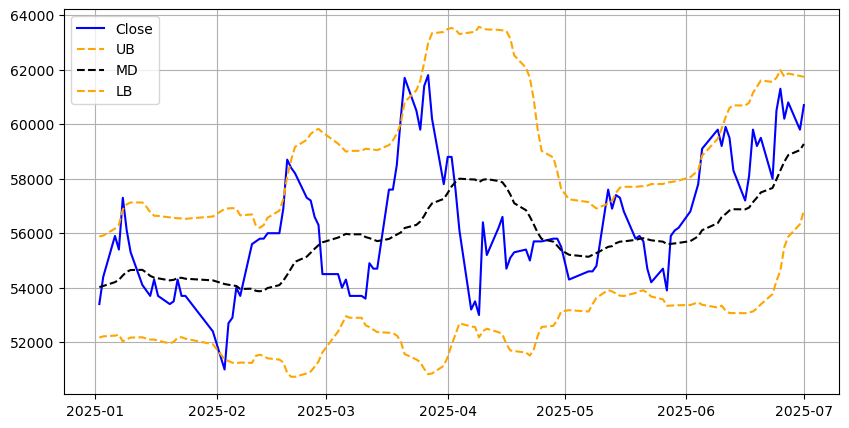

In [94]:
df2 = df[df.index.year >= 2025]

plt.figure(figsize = (10, 5))
plt.plot(df2.index, df2['Close'], color = 'b')
plt.plot(df2.index, df2['UpperBand'], color = 'orange', linestyle = "--")
plt.plot(df2.index, df2['MiddleBand'], color = 'k', linestyle = "--")
plt.plot(df2.index, df2['LowerBand'], color = 'orange', linestyle = "--")

plt.grid()
plt.legend(['Close', 'UB', 'MD', 'LB'])
plt.show()

In [95]:
def get_bollinger_bands(df, window = 20, std = 2):
    
    df["MiddleBand"] = df['Close'].rolling(window).mean()
    df['Std'] = df['Close'].rolling(window).std()
    
    df['UpperBand'] = df['MiddleBand'] + df['Std'] * std
    df['LowerBand'] = df['MiddleBand'] - df['Std'] * std
    return df

In [106]:
# 볼린저 밴드 지표를 기준으로 주가가 어느 위치에 있는지를 숫자(1~4)로 분류해주는 함수

def get_bollinger_band_position(df, window = 20, std = 2):

    df = df.copy()
    df['middle'] = df['Close'].rolling(window).mean()
    df['upper'] = df['middle'] + std * df['Close'].rolling(window).std()
    df['lower'] = df['middle'] - std * df['Close'].rolling(window).std()

    cond = [
        df['Close'] > df['upper'],      # 종가가 상단 밴드보다 위에 있음 → 가장 높은 위치 (4)
        df['Close'] > df['middle'],     # 종가가 중심선보다 위에 있음 (3)
        df['Close'] > df['lower']       # 종가가 하단 밴드보다 위에 있음 (2)
    ]

    choice = [4, 3, 2]

    df['bb_pos'] = np.select(cond, choice, default=1)      # 종가가 하단 밴드보다 아래에 있음 (1)
    df['bb_pos'] = df['bb_pos'].fillna(0)
    return df['bb_pos']

In [107]:
get_bollinger_band_position(df)

Date
2013-04-11    1
2013-04-12    1
2013-04-15    1
2013-04-16    1
2013-04-17    1
             ..
2025-06-25    3
2025-06-26    3
2025-06-27    3
2025-06-30    3
2025-07-01    3
Name: bb_pos, Length: 3000, dtype: int32

In [108]:
df = fdr.DataReader('005930')
get_bollinger_band_position(df)

Date
2013-04-11    1
2013-04-12    1
2013-04-15    1
2013-04-16    1
2013-04-17    1
             ..
2025-06-25    3
2025-06-26    3
2025-06-27    3
2025-06-30    3
2025-07-01    3
Name: bb_pos, Length: 3000, dtype: int32

In [109]:
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2013-04-11,30420,30800,30359,30800,225830,NaN
2013-04-12,30800,31000,30260,30340,214881,-0.014935
2013-04-15,30060,30699,30060,30460,215346,0.003955
2013-04-16,30100,30640,30020,30560,371037,0.003283
2013-04-17,31320,31320,30280,30360,209822,-0.006545
...,...,...,...,...,...,...
2025-06-25,61500,61600,60300,61300,23933612,0.013223
2025-06-26,61300,61300,59900,60200,19402300,-0.017945
2025-06-27,60100,61600,60000,60800,17340470,0.009967


In [111]:
def bollinger(data, n=20, std=2):
    s = pd.Series(data)
    middle = s.rolling(n).mean()
    std_band = s.rolling(n).std()
    upper = middle + std * std_band
    lower = middle - std * std_band
    return upper, middle, lower

class BB(Strategy):
    bb_window = 20
    bb_std = 2

    stop_pct = 5
    
    def init(self):
        self.upper, self.middle, self.lower = self.I(bollinger, self.data.Close, self.bb_window, self.bb_std)

    def next(self):
        current_price = self.data.Close[-1]
        if current_price < self.lower[-1] and not self.position:
            stop_price = current_price * (1 - self.stop_pct / 100)
            self.buy(sl = stop_price)
        elif self.upper[-1] < current_price and self.position:
            self.position.close()

df = fdr.DataReader("005930")

bt = Backtest(df, BB, cash = 1000000, commission=0.002)
stats = bt.run()
stats

Backtest.run:   0%|          | 0/2980 [00:00<?, ?bar/s]

Start                     2013-04-11 00:00:00
End                       2025-07-01 00:00:00
Duration                   4464 days 00:00:00
Exposure Time [%]                    40.76667
Equity Final [$]                  1200761.627
Equity Peak [$]                   1391484.067
Commissions [$]                    234494.873
Return [%]                           20.07616
Buy & Hold Return [%]               100.66007
Return (Ann.) [%]                      1.5487
Volatility (Ann.) [%]                 16.2954
CAGR [%]                              1.03817
Sharpe Ratio                          0.09504
Sortino Ratio                         0.14645
Calmar Ratio                          0.04558
Alpha [%]                           -17.69778
Beta                                  0.37526
Max. Drawdown [%]                   -33.97961
Avg. Drawdown [%]                    -7.42383
Max. Drawdown Duration     1373 days 00:00:00
Avg. Drawdown Duration      169 days 00:00:00
# Trades                          

In [114]:
# 1. 
df = fdr.DataReader("AAPL", "2023")
df["middle"] = df['Close'].rolling(20).mean()
df['std'] = df['Close'].rolling(20).std()
df['upper'] = df["middle"] + df['std'] * 2
df['lower'] = df["middle"] - df['std'] * 2
df

,Open,High,Low,Close,Volume,Adj Close,middle,std,upper,lower
2023-01-03,130.279999,130.899994,124.169998,125.070000,112117500,123.470604,NaN,NaN,NaN,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,89113600,124.744118,NaN,NaN,NaN,NaN
2023-01-05,127.129997,127.769997,124.760002,125.019997,80962700,123.421257,NaN,NaN,NaN,NaN
2023-01-06,126.010002,130.289993,124.889999,129.619995,87754700,127.962425,NaN,NaN,NaN,NaN
2023-01-09,130.470001,133.410004,129.889999,130.149994,70790800,128.485657,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-06-24,202.589996,203.440002,200.199997,200.300003,54064000,200.300003,200.2880,2.260531,204.809062,195.766939
2025-06-25,201.449997,203.669998,200.619995,201.559998,39525700,201.559998,200.3555,2.278166,204.911832,195.799168
2025-06-26,201.429993,202.639999,199.460007,201.000000,50799100,201.000000,200.3845,2.282717,204.949935,195.819066
2025-06-27,201.889999,203.220001,200.000000,201.080002,73188600,201.080002,200.4410,2.285380,205.011760,195.870241


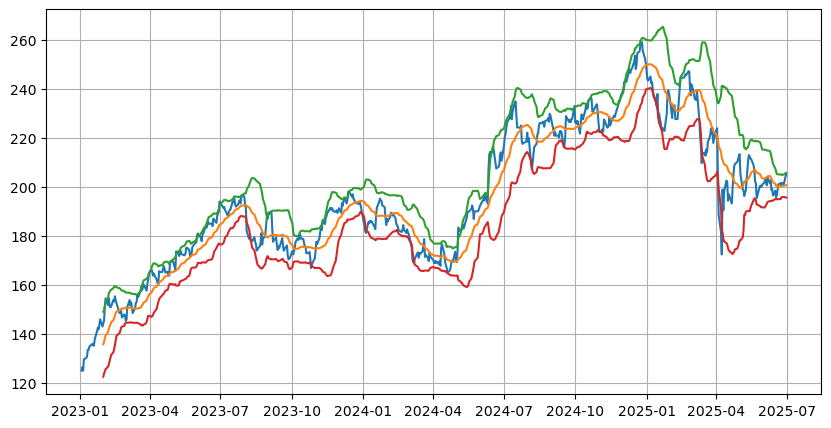

In [120]:
# 2.
plt.figure(figsize = (10, 5))
plt.plot(df['Close'])
plt.plot(df['middle'])
plt.plot(df['upper'])
plt.plot(df['lower'])
plt.grid()
plt.show()

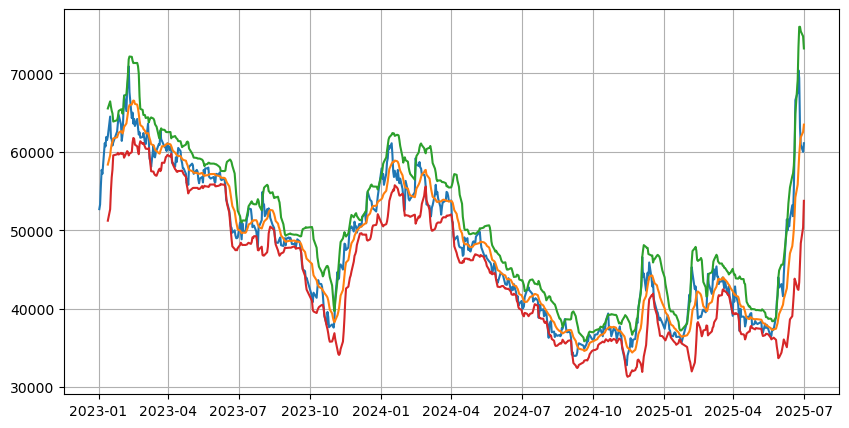

In [122]:
df = fdr.DataReader("035720", "2023")
df["middle"] = df['Close'].rolling(10).mean()
df['std'] = df['Close'].rolling(10).std()
df['upper'] = df["middle"] + df['std'] * 2
df['lower'] = df["middle"] - df['std'] * 2

plt.figure(figsize = (10, 5))
plt.plot(df['Close'])
plt.plot(df['middle'])
plt.plot(df['upper'])
plt.plot(df['lower'])
plt.grid()
plt.show()

In [124]:
df = fdr.DataReader("US500", "2020")

bt = Backtest(df, BB, cash = 100000, commission=0.001)
stats = bt.run()
stats

Backtest.run:   0%|          | 0/1361 [00:00<?, ?bar/s]

Start                     2019-12-31 00:00:00
End                       2025-06-30 00:00:00
Duration                   2008 days 00:00:00
Exposure Time [%]                    45.32947
Equity Final [$]                  116063.0069
Equity Peak [$]                   116063.0069
Commissions [$]                    4772.32641
Return [%]                           16.06301
Buy & Hold Return [%]                89.55674
Return (Ann.) [%]                     2.75551
Volatility (Ann.) [%]                15.54856
CAGR [%]                              1.88704
Sharpe Ratio                          0.17722
Sortino Ratio                         0.24548
Calmar Ratio                          0.10607
Alpha [%]                           -29.49921
Beta                                  0.50875
Max. Drawdown [%]                   -25.97894
Avg. Drawdown [%]                     -6.6738
Max. Drawdown Duration     1044 days 00:00:00
Avg. Drawdown Duration      157 days 00:00:00
# Trades                          

In [125]:
def rsi_func(price_series, n=14):
    series = pd.Series(price_series)
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).ewm(alpha=1/n, adjust=False).mean()
    loss = (-delta.where(delta < 0, 0)).ewm(alpha=1/n, adjust=False).mean()
    rs = gain / (loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi

def bollinger_bands_indicator(data_series, n=20, nsig=2):
    series = pd.Series(data_series)
    middle_band = series.rolling(window=n).mean()
    std_dev = series.rolling(window=n).std()
    upper_band = middle_band + (std_dev * nsig)
    lower_band = middle_band - (std_dev * nsig)
    return upper_band, middle_band, lower_band

In [127]:
class RSIANDBB(Strategy):
    rsi_period = 14
    rsi_buy = 30
    bb_period = 20
    bb_std = 2

    def init(self):
        self.rsi = self.I(rsi_func, self.data.Close, self.rsi_period)
        self.upper_band, self.middle_band, self.lower_band = self.I(
            bollinger_bands_indicator, self.data.Close, self.bb_period, self.bb_std
        )

    def next(self):
        if self.data.Close[-1] < self.lower_band[-1] and self.rsi[-1] < self.rsi_buy:
            if not self.position:
                self.buy()
    
            elif crossover(self.data.Close, self.middle_band):
                if self.position:
                    self.position.close()

In [129]:
df = fdr.DataReader("AAPL", "2020")

bt = Backtest(df, RSIANDBB, cash = 100000, commission=0.002)
stats = bt.run()
stats

Backtest.run:   0%|          | 0/1361 [00:00<?, ?bar/s]

Start                     2019-12-31 00:00:00
End                       2025-06-30 00:00:00
Duration                   2008 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                 318266.59324
Equity Peak [$]                  401787.92904
Return [%]                          218.26659
Buy & Hold Return [%]               153.03077
Return (Ann.) [%]                    23.52292
Volatility (Ann.) [%]                40.77832
CAGR [%]                             15.63765
Sharpe Ratio                          0.57685
Sortino Ratio                         1.09039
Calmar Ratio                          0.70365
Alpha [%]                            70.14151
Beta                                  0.96794
Max. Drawdown [%]                   -33.42972
Avg. Drawdown [%]                    -5.68966
Max. Drawdown Duration      525 days 00:00:00
Avg. Drawdown Duration       40 days 00:00:00
# Trades                                    0
Win Rate [%]                      

In [165]:
# 50일치(시가,고가,종가,저가,거래량,변화율) : 약 30% (재현율 1~2%)
# ETF: 여러개의 종목을 묶어놓은것. VOO: 미국1등~500등 

etfs = fdr.StockListing("ETF/KR")
etfs.head()

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,459580,6,KODEX CD금리액티브(합성),1073465,2,65,0.01,1073460.0,0.6809,170222,182727,84858
1,360750,4,TIGER 미국S&P500,20835,2,10,0.05,20874.0,0.4292,5740187,119757,82559
2,069500,1,KODEX 200,42110,2,410,0.98,42130.0,21.1786,6081598,257405,66681
3,488770,7,KODEX 머니마켓액티브,103190,3,0,0.00,103203.0,0.7714,364392,37602,64944
4,133690,4,TIGER 미국나스닥100,136050,2,60,0.04,136303.0,5.4480,191750,26109,51100


In [166]:
def calculate_rsi(data, window = 14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0).rolling(window = 14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window = 14).mean()
    RS = gain / (loss + 1e-10)
    RSI = 100 - (100 / (1 + RS))
    return RSI

etfs_dic = {}
for i in tqdm(range(len(etfs))):

    try:
        row = etfs.iloc[i]
        symbol = row['Symbol']
        name = row['Name']
        df = fdr.DataReader(symbol)
        df['RSI'] = calculate_rsi(df['Close'])
        df = df.dropna()
        df = df[['Close', 'Change', 'RSI']]
        etfs_dic[symbol] = [name, df]
    except:
        continue

100%|████████████████████████████████████████████████████████████████████████████████| 990/990 [01:49<00:00,  9.04it/s]


In [167]:
X = []
Y = []

window = 50

for symbol in tqdm(etfs_dic):
    name = etfs_dic[symbol][0]
    df = etfs_dic[symbol][1].copy().values
    for i in range(len(df) - window):
        A = df[i : i + window, 1:].flatten()
        before = df[i + window - 1, 0]
        after = df[i + window, 0]
        B = (after - before) / before * 100 >= 3.33
        if len(A) == 100:
            X.append(A)
            Y.append(B)

100%|███████████████████████████████████████████████████████████████████████████████| 908/908 [00:02<00:00, 383.35it/s]


In [168]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

train_x, test_x, train_y, test_y = train_test_split(X, Y, stratify=Y)

model = XGBClassifier()
model.fit(train_x, train_y)

pred = model.predict(test_x)

report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

       False       0.99      1.00      0.99    263372
        True       0.75      0.26      0.39      4943

    accuracy                           0.98    268315
   macro avg       0.87      0.63      0.69    268315
weighted avg       0.98      0.98      0.98    268315



In [169]:
model.fit(X, Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [170]:
for symbol in etfs_dic:
    try:
        name = etfs_dic[symbol][0]
        df = etfs_dic[symbol][1].copy()[['Change', 'RSI']].values[-window:].flatten()
        pred = model.predict([df])
        if pred[0] == 1:
            print(name)
    except:
        continue

PLUS K방산
ACE 테슬라밸류체인액티브
SOL K방산
RISE 팔라듐선물인버스(H)
